<a href="https://colab.research.google.com/github/sleeptiger/Abc-project/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 머신러닝 기초

## 머신러닝이란?

1. 묘사분석(어떤 일이 생겼는가?)
2. 진단 분석(왜 이 일이 생겼는가?)
3. 예측 분석(미래에 무슨일이 생길까?)
4. 처방 분석(무엇을 행동해야하는가?)

- 3번4번이 머신러닝을 활용하는 단계 분석

- 머신러닝으로 할 수 있는 것들
> - 분류, 예측 분석
> - 이미지 인식
> - 음성, 테스트 인식
> - 추천 시스템


## 전처리 기본(정규화, 표준화, 범주형 데이터, 학습/테스트 세트 분할)


- 머신러닝의 가장 중요한 부분은 **데이터 전처리**입니다.
- 데이터 분석가의 머신러닝 모델의 성능을 활성하기 위한 작업중 70%이상이 전처리 부분에 해당합니다.
- 전처리 작업에는 **결측값 처리, 정규화, 표준화(수치형), 범주형 데이터의 수치형 변환, 학습/테스트 분할, Feature Engineering emd**이 있다.

In [2]:
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [5]:
# 결측값 제거
penguins = penguins.dropna().reset_index(drop=True)

In [6]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.3+ KB


### 정규화(Normalization), 표준화(Standardization)

- 정규화와 표준화는 모두 수치형 데이터 전처리에서 중요한 요소입니다.
- 학습 데이터의 feature 간 단위나 스케일(scale)차이가 클수록 학습 모델의 성능이 저하된다.
- 따라서 수치형 데이터의 **단위를 맞춰주는 작업을 스케일링(scaling)이라고 합니다.
- 스케링에는 일정 구간을 정해주는 정규화(Normalization) 방법과 평균(0)과 표준편차(1)를 사용하는 표준화(Standardization) 방법이 있습니다.

- 정규화
> - 0~1사이의 값으로 변환(수치형 컬럼에서만 정규화 가능) 플러스 값으로 표현

- 표준화
> - 평균을 0으로 하고 표준편차를 1로 한다.(비지도 학습 사용시 사용함)(최솟값/최댓값이 설정 안될 시에 사용)

In [7]:
# feature 들 간 단위가 다릅니다. (bill_length_mm/bill_depth_mm/flipper_length_mm)
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
328,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
329,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
330,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
331,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


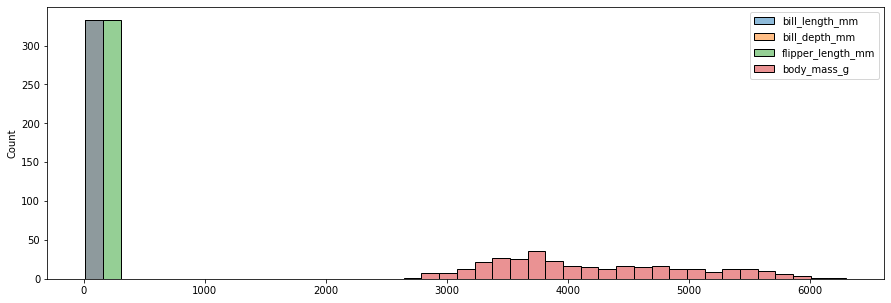

In [9]:
# 도표를 통해 확인 
plt.figure(figsize=(15,5 ))
sns.histplot(data=penguins)
# 데이터의 편차가 너무 심하다 정리가 필요

**정규화(Normalization)**
- `MinMaxScaler`를 활용한 0-1 사이 분포 만들기
- 같은 범위의 데이터로 변환하기 때문에, 모델 학습 성능이 좋아지고, 학습 시간이 줄어드는 효과가 있다.
- 자릿수가 늘어나지 않아 연산 오버플로우(`numeric overflow`)를 방지 할 수있다.

In [15]:
from sklearn.preprocessing import MinMaxScaler # 라이브러리 로딩
scaler = MinMaxScaler() # 스케일러로 정의

penguins_normed = penguins.copy()
features = penguins_normed[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']] # 정규화 대상 선택
features_normed = scaler.fit_transform(features)  #정규화 실행
features_normed.shape

(333, 4)

In [16]:
features_normed
# 순서대로 1 col =bill_length/ 2 col =bill_depth/ 3 col = flipper_length / 4 col = body_mass_g

array([[0.25454545, 0.66666667, 0.15254237, 0.29166667],
       [0.26909091, 0.51190476, 0.23728814, 0.30555556],
       [0.29818182, 0.58333333, 0.38983051, 0.15277778],
       ...,
       [0.66545455, 0.30952381, 0.84745763, 0.84722222],
       [0.47636364, 0.20238095, 0.6779661 , 0.69444444],
       [0.64727273, 0.35714286, 0.69491525, 0.75      ]])

In [18]:
# 정규화 시킨 데이터 입히기
# .assign (데이터 삽입하기)
penguins_normed = penguins_normed.assign(bill_length_mm = features_normed[:,0],
                                         bill_depth_mm = features_normed[:,1],
                                         flipper_length_mm = features_normed[:,2],
                                         body_mass_g = features_normed[:,3])

penguins_normed

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,0.254545,0.666667,0.152542,0.291667,Male
1,Adelie,Torgersen,0.269091,0.511905,0.237288,0.305556,Female
2,Adelie,Torgersen,0.298182,0.583333,0.389831,0.152778,Female
3,Adelie,Torgersen,0.167273,0.738095,0.355932,0.208333,Female
4,Adelie,Torgersen,0.261818,0.892857,0.305085,0.263889,Male
...,...,...,...,...,...,...,...
328,Gentoo,Biscoe,0.549091,0.071429,0.711864,0.618056,Female
329,Gentoo,Biscoe,0.534545,0.142857,0.728814,0.597222,Female
330,Gentoo,Biscoe,0.665455,0.309524,0.847458,0.847222,Male
331,Gentoo,Biscoe,0.476364,0.202381,0.677966,0.694444,Female


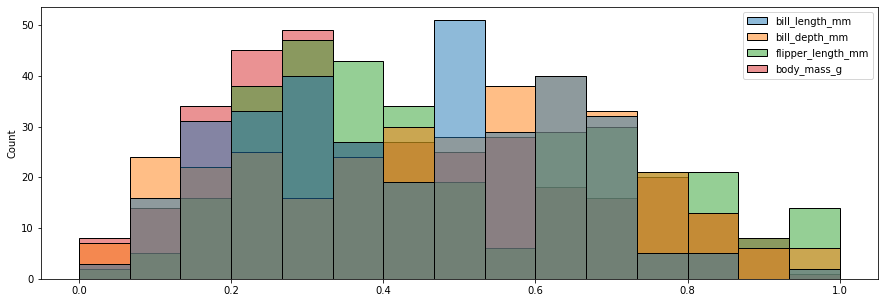

In [19]:
# 눈의로 확인 하기
plt.figure(figsize=(15, 5))
sns.histplot(data=penguins_normed)
# 혼자 떨어져 있는 데이터가 없고 모여있는 데이터로 합쳐졌다.

**표준화(Standardization)**
- `StandardScaler`를 활용한 평균 0, 표준편차 1 분표 만들기
- 만약 Feature 가 단위 차이가 극심하게 차이가 나는 상황이라면, 정규화 보다는 표준화 방법이 선호된다.      (정규화는 작은 범위로 데이터를 압축하기 때문에 정보 손실이 발생한다.)
- 비지도 학습(최대 최소 범위를 알기 힘든 상황)에서도 **표준화 방법**이 선호됩니다.

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # 스케일러 정의 

penguins_stand = penguins.copy()
features = penguins_stand[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']] # 표준화 대상 지정
features_stand = scaler.fit_transform(features) # 표준화 

In [25]:
# .assign (데이터 삽입하기)
penguins_stand = penguins_stand.assign(bill_length_mm = features_stand[:,0],
                                         bill_depth_mm = features_stand[:,1],
                                         flipper_length_mm = features_stand[:,2],
                                         body_mass_g = features_stand[:,3])

penguins_stand

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,-0.896042,0.780732,-1.426752,-0.568475,Male
1,Adelie,Torgersen,-0.822788,0.119584,-1.069474,-0.506286,Female
2,Adelie,Torgersen,-0.676280,0.424729,-0.426373,-1.190361,Female
3,Adelie,Torgersen,-1.335566,1.085877,-0.569284,-0.941606,Female
4,Adelie,Torgersen,-0.859415,1.747026,-0.783651,-0.692852,Male
...,...,...,...,...,...,...,...
328,Gentoo,Biscoe,0.587352,-1.762145,0.931283,0.892957,Female
329,Gentoo,Biscoe,0.514098,-1.457000,1.002739,0.799674,Female
330,Gentoo,Biscoe,1.173384,-0.744994,1.502928,1.919069,Male
331,Gentoo,Biscoe,0.221082,-1.202712,0.788372,1.234995,Female


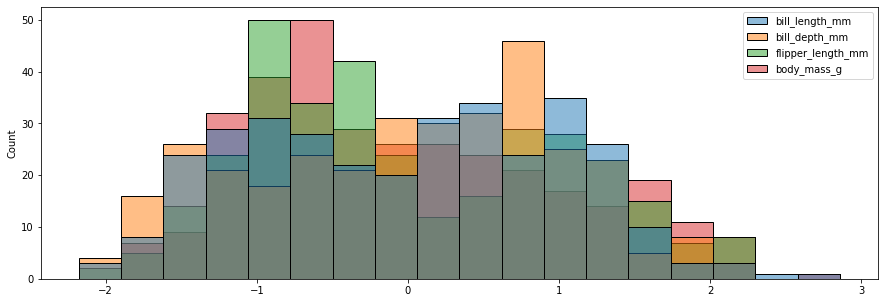

In [26]:
# 눈으로 확인
plt.figure(figsize=(15,5))
sns.histplot(data=penguins_stand)

### **범주형 데이터의 수치화 (인코딩,Encoding)**
> - scikt-learn의 머신 러닝 알고리즘은 범주형 데이터를 계산할 수 없습니다.
> - 따라서 일반적으로 범주형 데이터를 수치화(인코딩)해서 사용합니다.
> - 범주형 데이터 수치화 방법 : 대표적으로 `라벨 인코딩(Label Encoding), 원핫 인코딩(One-hot Encoding)` 방법이 있습니다.

In [29]:
penguins_stand

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,-0.896042,0.780732,-1.426752,-0.568475,Male
1,Adelie,Torgersen,-0.822788,0.119584,-1.069474,-0.506286,Female
2,Adelie,Torgersen,-0.676280,0.424729,-0.426373,-1.190361,Female
3,Adelie,Torgersen,-1.335566,1.085877,-0.569284,-0.941606,Female
4,Adelie,Torgersen,-0.859415,1.747026,-0.783651,-0.692852,Male
...,...,...,...,...,...,...,...
328,Gentoo,Biscoe,0.587352,-1.762145,0.931283,0.892957,Female
329,Gentoo,Biscoe,0.514098,-1.457000,1.002739,0.799674,Female
330,Gentoo,Biscoe,1.173384,-0.744994,1.502928,1.919069,Male
331,Gentoo,Biscoe,0.221082,-1.202712,0.788372,1.234995,Female


In [30]:
penguins_stand['island'].unique()
# 3가지의 value 존재    

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [31]:
penguins_stand['sex'].unique()
# 남/녀 2개 존재

array(['Male', 'Female'], dtype=object)

> 라벨 인코딩 (`Label Encoding`)
> - 범주형 데이터의 범주 가짓수에 따라 숫자를 할당해주는 방법입니다.

In [35]:
from sklearn.preprocessing import LabelEncoder # 라이브러리 로딩
encoder = LabelEncoder() 

penguins_label = penguins_stand.copy()
features = penguins_label[['species', 'island', 'sex']] # 인코딩 할 대상
encoded = features.apply(encoder.fit_transform)
encoded

,species,island,sex
0,0,2,1
1,0,2,0
2,0,2,0
3,0,2,0
4,0,2,1
...,...,...,...
328,2,0,0
329,2,0,0
330,2,0,1
331,2,0,0


In [36]:
# 수치형 데이터로 바꾸지
penguins_label = penguins_label.assign(species = encoded['species'],
                                       island = encoded['island'],
                                       sex = encoded['sex'])

penguins_label

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,-0.896042,0.780732,-1.426752,-0.568475,1
1,0,2,-0.822788,0.119584,-1.069474,-0.506286,0
2,0,2,-0.676280,0.424729,-0.426373,-1.190361,0
3,0,2,-1.335566,1.085877,-0.569284,-0.941606,0
4,0,2,-0.859415,1.747026,-0.783651,-0.692852,1
...,...,...,...,...,...,...,...
328,2,0,0.587352,-1.762145,0.931283,0.892957,0
329,2,0,0.514098,-1.457000,1.002739,0.799674,0
330,2,0,1.173384,-0.744994,1.502928,1.919069,1
331,2,0,0.221082,-1.202712,0.788372,1.234995,0


> 원 핫 인코딩 (`One Hot Encoding`)
> - 범주형 데이터의 범주 가짓수에 컬럼을 추가 해주는 방법입니다.
> - 범주에 포함되는 컬럼에 1을 부여하고 다른 컬럼을 0을 부여한다.

In [57]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

penguins_onehot = penguins_stand.copy()
features = penguins_onehot[['species', 'island', 'sex']]
encoded = encoder.fit_transform(features).toarray() 

In [61]:
encoded

array([[1., 0., 0., ..., 1., 0., 1.],
       [1., 0., 0., ..., 1., 1., 0.],
       [1., 0., 0., ..., 1., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 1.]])

In [42]:
encoder.categories_

[array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object),
 array(['Biscoe', 'Dream', 'Torgersen'], dtype=object),
 array(['Female', 'Male'], dtype=object)]

In [58]:
# 기존 범주형 컬럼 버리기
penguins_onehot = penguins_onehot.drop(columns=['species', 'island', 'sex'])

#인코딩 결과 프레임 생성
encoded_df = pd.DataFrame(encoded)
encoded_df.columns = encoder.get_feature_names_out()

#기존 데이터 프레임과 결함
penguins_onehot = pd.concat([penguins_onehot, encoded_df], axis=1)

In [59]:
penguins_onehot

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male
0,-0.896042,0.780732,-1.426752,-0.568475,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,-0.822788,0.119584,-1.069474,-0.506286,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,-0.676280,0.424729,-0.426373,-1.190361,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,-1.335566,1.085877,-0.569284,-0.941606,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,-0.859415,1.747026,-0.783651,-0.692852,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
328,0.587352,-1.762145,0.931283,0.892957,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
329,0.514098,-1.457000,1.002739,0.799674,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
330,1.173384,-0.744994,1.502928,1.919069,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
331,0.221082,-1.202712,0.788372,1.234995,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


### 학습/테스트 데이터 세트 분할


- scikt-learn 은 학습 데이터 세트를 자동으로 분할해주는 기능을 제공합니다.
- 테스트에 사용하고 싶은 데이터를 비율로 조종할 수 있다.

In [63]:
penguins_label.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,-0.896042,0.780732,-1.426752,-0.568475,1
1,0,2,-0.822788,0.119584,-1.069474,-0.506286,0
2,0,2,-0.676280,0.424729,-0.426373,-1.190361,0
3,0,2,-1.335566,1.085877,-0.569284,-0.941606,0
4,0,2,-0.859415,1.747026,-0.783651,-0.692852,1


In [65]:
from sklearn.model_selection import train_test_split

X = penguins_label.drop('sex', axis=1)      # 예측에 사용되는 변수
Y = penguins_label['sex']                   # 예측할 변수

In [66]:
#학습/테스트 세트 분할
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

In [68]:
len(X_train), len(Y_train), len(Y_test), len(Y_test)

(266, 266, 67, 67)

In [69]:
X_train

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
128,0,1,-1.079177,0.221299,-0.998018,-0.972701
11,0,2,-0.969296,0.933305,-0.426373,-0.941606
100,0,0,-0.987609,0.017869,-0.140551,-0.568475
240,2,0,0.697233,-1.100997,1.002739,1.794692
223,2,0,0.514098,-0.897567,1.002739,1.172806
...,...,...,...,...,...,...
236,2,0,0.459158,-1.355285,0.859828,0.239977
101,0,0,-1.060863,1.441880,-0.783651,-0.381909
179,1,1,1.283265,0.831590,0.145272,-0.133155
39,0,1,-1.280626,-0.134704,-1.140929,-1.501304


In [70]:
Y_test

297    1
121    1
184    0
237    1
124    0
      ..
285    0
216    0
278    1
209    1
224    0
Name: sex, Length: 67, dtype: int64